# Movie Analysis For Microsoft

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### b) Defining the Metric for success
The actionable recomendation would depend on my dataset tha gives insight on the ratings of movies, the genres of movies and their relation with success of the upcoming movie studio project.


### c) Understanding the context 
The dataset used for this analysis was from im.db and bom.movie_gross.csv, tha is from the IMDB and movies gross. These data contains information on the ratings of movies and the gross value of movies. What I will be focusing on from the IMDB data is the movie ratings and the movie basics tables, and as for gross value, I will focus on domestic gross values.

### d) Recording the Experimental Design
PROCEDURE; Data selection, Data cleaning, Data analysis and Data visualization

## 2. Reading the Data

In [ ]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/MallCustomersDataset
# --dd-
import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
#connecting sql to access im.db files
conn = sqlite3.connect('im.db')
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print("Phase 1 data set list of tables\n")
print(cursor.fetchall())

In [33]:
mb_df = pd.read_sql(""" SELECT * 
FROM movie_basics;""", conn)
mb_df
mb_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [4]:
mr_df = pd.read_sql(""" SELECT * FROM movie_ratings;
""", conn)
mr_df
mr_df.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [5]:
# load gross of movies data 
gross_df = pd.read_csv('bom.movie_gross.csv.gz')
gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


##### 
Merging the gross data and the IMDB data to get one dataframe for easy analysing

In [6]:
# merging the data to form one dataframe

merged_df = pd.merge(left=mb_df, right=mr_df, on='movie_id')
merged_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [7]:
# checking the dataframe 

merged_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [8]:
# checking the statistics of the numerical column

merged_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [9]:
# previewing the dataframe
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
# getting the statistics of the numerical column

gross_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [11]:
#rename my column to be able to merge

gross_df.rename(columns = {'title':'primary_title'}, inplace = True)
gross_df.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [12]:
# merge the datasets from imdb and gross  to get one whole data frame

df = pd.merge(left = merged_df, right = gross_df, on = 'primary_title')
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [13]:
# previewing the complete dataframe
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [14]:
# checking for statistics on numerical columns
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,3027.000000,2980.000000,3027.000000,3.027000e+03,3.005000e+03,3027.000000
mean,2013.783284,107.217114,6.457582,6.170030e+04,3.064033e+07,2014.077635
std,2.466955,20.073886,1.012277,1.255132e+05,6.671629e+07,2.442245
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.117000e+03,1.390000e+05,2012.000000
50%,2014.000000,105.000000,6.600000,1.310900e+04,2.000000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,6.276550e+04,3.250000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


In [15]:
# checking for general info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [16]:
# previewing the shape of the data
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns')

The data has 3027 rows and 12 columns


In [17]:
budget_df = pd.read_csv('tn.movie_budgets.csv.gz')
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [49]:
budget_df.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  



## 3. Checking the Data

In [18]:
# Previewing the top of our dataset

df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015
7,tt0372538,Spy,Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Fox,110800000.0,124800000,2015
8,tt3079380,Spy,Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Fox,110800000.0,124800000,2015
9,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,10800000,2011


In [19]:
# Previewing the bottom of our dataset
df.tail(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
3017,tt8097306,Nobody's Fool,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Par.,31700000.0,1800000,2018
3018,tt8108198,Andhadhun,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Eros,1200000.0,NaN,2018
3019,tt8119752,Gonjiam: Haunted Asylum,Gon-ji-am,2018,95.0,"Horror,Mystery",6.1,2585,WGUSA,115000.0,NaN,2018
3020,tt8267604,Capernaum,Capharnaüm,2018,126.0,Drama,8.5,20215,SPC,1700000.0,NaN,2018
3021,tt8290698,The Spy Gone North,Gongjak,2018,137.0,Drama,7.2,1620,CJ,501000.0,NaN,2018
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018
3026,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Trafalgar,4200000.0,16100000,2018


In [20]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


## 5. Tidying the Dataset


Before any analysis and processing of data we need to clean the data to check for inconsistencies, duplicates and maybe missing data too.

In [21]:
# Identifying the Missing Data
df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [22]:
# calculating the percentage of missing values
null_values = pd.DataFrame(df.isna().sum()/len(df)*100).rename(columns = {0: 'Null percentage'})
null_values = null_values[(null_values[ 'Null percentage'] > 0)]
null_values.sort_values(by = 'Null percentage', ascending = False)

,Null percentage
foreign_gross,39.478031
runtime_minutes,1.552692
domestic_gross,0.726792
genres,0.231252
studio,0.099108


The column foreign_gross has close to 40% missing data and thats alot of missing data hence dropping the column will be needed so that we can have some consistency.

In [23]:
df.drop(columns = 'foreign_gross', inplace = True)

In [24]:
#previewing the missing columns

df[['runtime_minutes', 'domestic_gross', 'genres', 'studio']].head()

,runtime_minutes,domestic_gross,genres,studio
0,103.0,1100000.0,"Action,Crime,Drama",Relbig.
1,124.0,744000.0,"Adventure,Drama,Romance",IFC
2,89.0,744000.0,Drama,IFC
3,121.0,744000.0,Drama,IFC
4,114.0,58200000.0,"Adventure,Comedy,Drama",Fox


In [25]:
# dealing with the missing values

df.fillna(value = 'MISSING', inplace = True)

In [26]:
# drop rows with missing values
df.dropna()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
0,tt0315642,Wazir,Wazir,2016,103,"Action,Crime,Drama",7.1,15378,Relbig.,1.1e+06,2016
1,tt0337692,On the Road,On the Road,2012,124,"Adventure,Drama,Romance",6.1,37886,IFC,744000,2012
2,tt4339118,On the Road,On the Road,2014,89,Drama,6.0,6,IFC,744000,2012
3,tt5647250,On the Road,On the Road,2016,121,Drama,5.7,127,IFC,744000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"Adventure,Comedy,Drama",7.3,275300,Fox,5.82e+07,2013
...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102,Drama,7.1,147,FM,300,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101,Romance,6.5,607,WGUSA,747000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135,Drama,5.4,673,Eros,72000,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114,"Drama,Romance",6.4,322,CL,181000,2018


In [34]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
0,tt0315642,Wazir,Wazir,2016,103,"Action,Crime,Drama",7.1,15378,Relbig.,1.1e+06,2016
1,tt0337692,On the Road,On the Road,2012,124,"Adventure,Drama,Romance",6.1,37886,IFC,744000,2012
2,tt4339118,On the Road,On the Road,2014,89,Drama,6.0,6,IFC,744000,2012
3,tt5647250,On the Road,On the Road,2016,121,Drama,5.7,127,IFC,744000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"Adventure,Comedy,Drama",7.3,275300,Fox,5.82e+07,2013
...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102,Drama,7.1,147,FM,300,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101,Romance,6.5,607,WGUSA,747000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135,Drama,5.4,673,Eros,72000,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114,"Drama,Romance",6.4,322,CL,181000,2018


In [28]:
# checking for duplicates
print(f'This data has {df.duplicated().sum()} duplicates')

This data has 0 duplicates


In [29]:
# checking for unique values
df['domestic_gross'].value_counts()

1300000.0      31
1000000.0      28
1800000.0      28
1100000.0      27
1400000.0      24
               ..
652300000.0     1
27800.0         1
74900.0         1
25800000.0      1
217600000.0     1
Name: domestic_gross, Length: 1523, dtype: int64

In [31]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
0,tt0315642,Wazir,Wazir,2016,103,"Action,Crime,Drama",7.1,15378,Relbig.,1.1e+06,2016
1,tt0337692,On the Road,On the Road,2012,124,"Adventure,Drama,Romance",6.1,37886,IFC,744000,2012
2,tt4339118,On the Road,On the Road,2014,89,Drama,6.0,6,IFC,744000,2012
3,tt5647250,On the Road,On the Road,2016,121,Drama,5.7,127,IFC,744000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"Adventure,Comedy,Drama",7.3,275300,Fox,5.82e+07,2013
...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102,Drama,7.1,147,FM,300,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101,Romance,6.5,607,WGUSA,747000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135,Drama,5.4,673,Eros,72000,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114,"Drama,Romance",6.4,322,CL,181000,2018


In [35]:
df['domestic_gross']

0        1.1e+06
1         744000
2         744000
3         744000
4       5.82e+07
          ...   
3022         300
3023      747000
3024       72000
3025      181000
3026     4.2e+06
Name: domestic_gross, Length: 3027, dtype: object

In [38]:
df['domestic_gross'].dtype

dtype('O')

In [41]:
ar_df = df.sort_values(by = ['averagerating'], ascending = False)
ar_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
173,tt6168914,The Runaways,The Runaways,2019,108,Adventure,9.2,47,App.,3.6e+06,2010
658,tt1455256,The Wall,The Wall,2010,78,Documentary,9.2,8,RAtt.,1.8e+06,2017
2039,tt2831326,Tomorrow,Tomorrow,2015,115,Drama,9.1,15,UTMW,62500,2017
638,tt6216234,The Way,The Way,2016,85,Documentary,9.0,9,PDA,4.4e+06,2011
1186,tt1744662,The Mayor,The Mayor,2011,68,"Comedy,Documentary,Drama",8.9,49,WGUSA,96800,2017
...,...,...,...,...,...,...,...,...,...,...,...
2119,tt3007924,Amy,Amy,2013,94,Horror,1.9,247,A24,8.4e+06,2015
60,tt3746918,The Losers,The Losers,2013,112,Drama,1.7,70,WB,2.36e+07,2010
1843,tt2344678,Himmatwala,Himmatwala,2013,150,"Action,Comedy,Drama",1.7,7384,UTV,271000,2013
1110,tt1702443,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,2011,105,"Documentary,Music",1.6,74978,Par.,7.3e+07,2011


In [51]:
# saving clean data to a csv
df.to_csv('NewMicrosoftmoviestudio.csv', index = False)

## 6. Exploratory Analysis

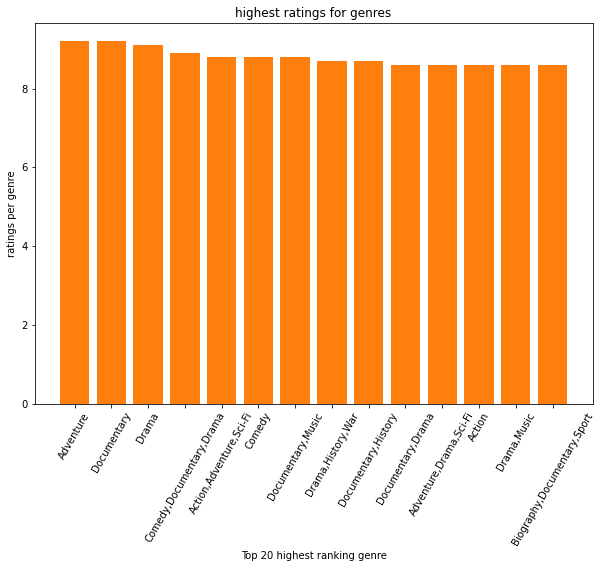

In [43]:
fig = plt.figure(figsize =(10, 7))
df1=ar_df.head(20)
x =df1["genres"]
y =df1["averagerating"]
plt.bar(x[0:10], y[0:10])

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 60)
ax.set_xlabel("Top 20 highest ranking genre")
ax.set_ylabel("ratings per genre")
ax.set_title("highest ratings for genres")
plt.bar(x,y)
plt.show()

This bar graph shows the top 20 genres of movies with high ratings. With Adventure and Documentary genres being the leading genres with highest ratings.

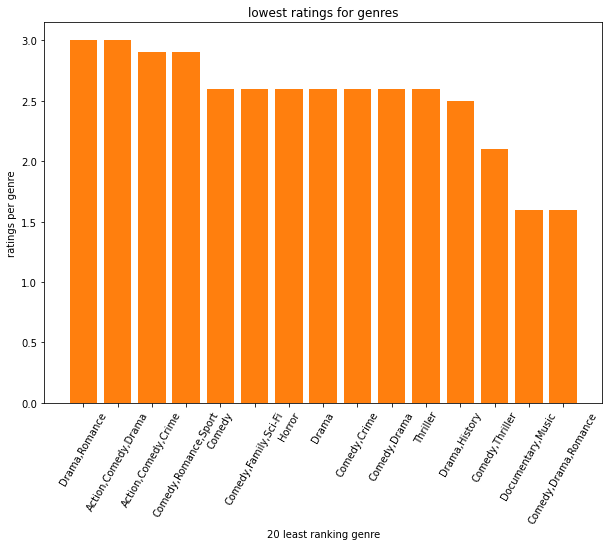

In [44]:
fig = plt.figure(figsize =(10, 7))
df1=ar_df.tail(20)
x =df1["genres"]
y =df1["averagerating"]
plt.bar(x[0:10], y[0:10])

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 60)
ax.set_xlabel("20 least ranking genre")
ax.set_ylabel("ratings per genre")
ax.set_title("lowest ratings for genres")
plt.bar(x,y)
plt.show()

This bar graph shows the least ratings of genres of movies, with Comedy,Drama,Romance being the least voted for likeable movie genre.

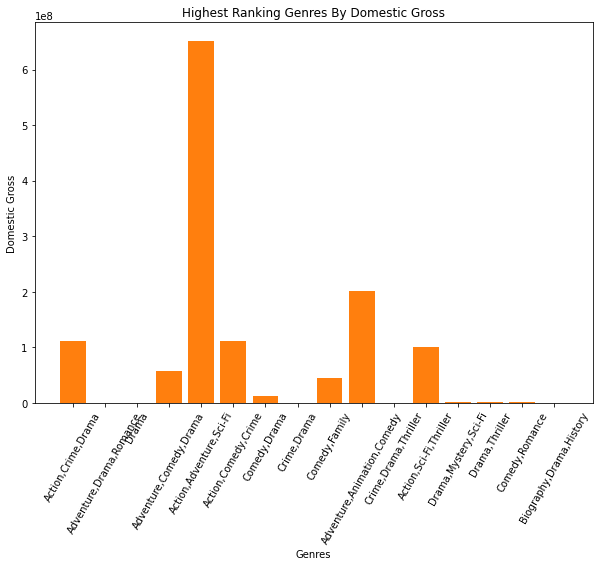

In [47]:
fig = plt.figure(figsize =(10, 7))
df1=df.head(20)
x =df1['genres'][:20].values
y =df1['domestic_gross'][:20]
plt.bar(x[0:10], y[0:10])
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 60)
ax.set_xlabel("Genres")
ax.set_ylabel("Domestic Gross")
ax.set_title("Highest Ranking Genres By Domestic Gross")
plt.bar(x,y)
plt.show()

This bar graph shows different genres of movies with the highest domestic gross. we have Adventure,Comedy,Drama as the highest gross income movie genres.




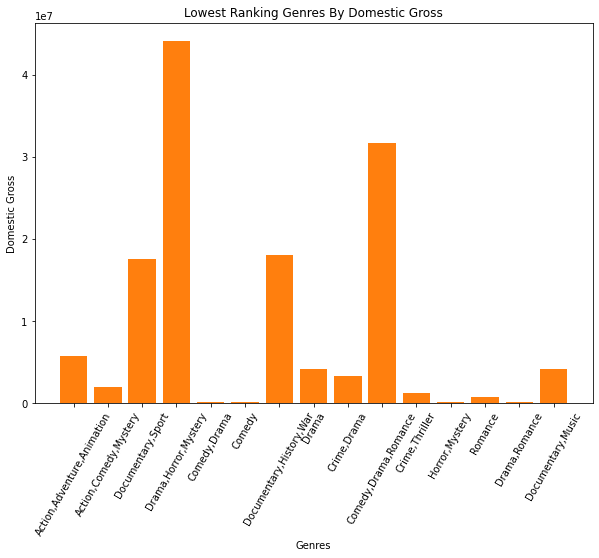

In [48]:
fig = plt.figure(figsize =(10, 7))
df1=df.tail(20)
x =df1['genres'][:20].values
y =df1['domestic_gross'][:20]
plt.bar(x[0:10], y[0:10])
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 60)
ax.set_xlabel("Genres")
ax.set_ylabel("Domestic Gross")
ax.set_title("Lowest Ranking Genres By Domestic Gross")
plt.bar(x,y)
plt.show()

This bar graph shows the  genre of movies tha earns the least gross income, we have Horror,Mystery as the genre with the least domestic gross

## 7. Implementing the Solution

Adventure,Comedy,Drama genre of movies are the best to get into since they gross highest.

Adventure and Documentary should be considered as a venture because the rank highest with rankings and votes from viewers.

Horror,Mystery and Comedy,Drama should be avoided as a venture since the have the lowest ranking as well as the least gross income.